# Сборный проект: Анализ факторов, влияющих на успешность компьютерных игр #

**Описание проекта:**
Предоставлены данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед нами данные до 2016 года. Сейчас декабрь 2016 г., и Мы
планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.

**Цель исследования - провести исследовательский анализ данных, составить портрет пользователя каждого региона и проверить следующие гипотезы:**
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.

**Исследование пройдет в несколько этапов:**
1. Обзор данных;
2. Предобработка данных;
3. Исследовательский нализ данных;
4. Составление портретов пользователей каждого региона; 
5. Проверка гипотез;
6. Подведение итогов (вывод).

## Обзор данных ##

Для начала импортируем необходимые для работы библиотеки, запишем наши данные в переменные, откроем их и просмотрим информацию о них.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import math
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
try:
    data = pd.read_csv ('games.csv')
except:
    data = pd.read_csv ('/datasets/games.csv')

In [4]:
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


**Описание данных:**
* Name — название игры. Тип - object, подходит значениям столбца.
* Platform — платформа. Тип - object, подходит значениям столбца.
* Year_of_Release — год выпуска. Тип - float64, необходимо изменение типа данных для корректной работы с ними.
* Genre — жанр игры. Тип - object, подходит значениям столбца.
* NA_sales — продажи в Северной Америке (миллионы проданных копий). Тип - float64, подходит значениям столбца.
* EU_sales — продажи в Европе (миллионы проданных копий). Тип - float64, подходит значениям столбца.
* JP_sales — продажи в Японии (миллионы проданных копий). Тип - float64, подходит значениям столбца.
* Other_sales — продажи в других странах (миллионы проданных копий). Тип - float64, подходит значениям столбца.
* Critic_Score — оценка критиков (максимум 100). Тип - float64, необходимо изменение типа данных для корректной работы с ними.
* User_Score — оценка пользователей (максимум 10). Тип - float64, подходит значениям столбца.
* Rating — рейтинг от организации ESRB. Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Тип - object, подходит значениям столбца.

### Вывод ###

1. Много названий столбцов, несоответствующих требованиям хорошего стиля, их  будет необходимо переименовать.
2. Имеются столбцы с неправильными типами данных, которые в дальнейшем придется изменить.
3. Во многих столбцах имеются пропуски, их необходимо обработать.

## Предобработка данных ##

### Замена названий столбцов ###

Приведем названия к нижнему регистру.

In [7]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Поиск дубликатов и аномалий ###

Сначала проверим датасет на наличие полных дубликатов.

In [8]:
data[data.duplicated() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [9]:
def unique (df):
    for column in df.columns:
        print('Уникальные значения столбца', column)
        print (df[column].sort_values().unique())
        print ('--------------------------')
    return
unique (data)

Уникальные значения столбца name
[' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]
--------------------------
Уникальные значения столбца platform
['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']
--------------------------
Уникальные значения столбца year_of_release
[1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016.   nan]
--------------------------
Уникальные значения столбца genre
['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy' nan]
--------------------------
Уникальные значения столбца na_sales
[0.000e+00 1.000e-02

Теперь поищем дубликаты и аномалии вручную.

In [10]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False) == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [11]:
data = data.drop(labels = [16230],axis = 0)

In [12]:
data = data.reset_index(drop=True)

Записи с индексами 659 и 14244 будут перезаписаны ниже.

In [13]:
data[data[['name', 'platform','year_of_release']].duplicated() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.0,0.03,0.0,NaN,NaN,NaN


In [14]:
data[data[['platform','year_of_release','genre','rating']].duplicated(keep=False) == True].sort_values(by='name').head(1000)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14983,Beyblade Burst,3DS,2016.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1079,Fire Emblem Fates,3DS,2015.0,Role-Playing,0.81,0.23,0.52,0.11,NaN,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
13794,Haikyu!! Cross Team Match!,3DS,2016.0,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
2454,Tales of Xillia 2,PS3,2012.0,Role-Playing,0.20,0.12,0.45,0.07,71.0,7.9,T
4728,'98 Koshien,PS,1998.0,Sports,0.15,0.10,0.12,0.03,NaN,NaN,NaN
8342,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,0.00,0.00,0.17,0.00,NaN,NaN,NaN
7087,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,0.11,0.09,0.00,0.03,NaN,NaN,NaN
8597,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,0.00,0.00,0.16,0.00,NaN,NaN,NaN
8293,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,0.00,0.00,0.17,0.00,NaN,NaN,NaN


У некоторых игр есть отдельная строки для продаж в конкретных регионах. Найдем эти строки. Выполним заполнение столбца name здесь, так как при наличии NaN в столбце цикл работать не будет.

In [15]:
data['name'] = data['name'].fillna('unknown')

Удалим все окончания из названий, затем получившиеся дубликаты перезапишем и удалим.

Посчитаем количество дубликатов для проверки в дальнейшем.

In [16]:
len_duplicates = len(data[data[['platform','year_of_release','genre']].duplicated() == True].sort_values(by='name'))

In [17]:
len_duplicates

14803

Дубликатов слишком много, чтобы устранять их вручную. Необходимо автоматизировать этот процесс.

In [18]:
data.loc[data["name"].str.contains('ales)', regex=False), "name"].str.split("(", expand=True)[0].str.strip()

788                                                        Project Gotham Racing
920                                             Medal of Honor: European Assault
1123                                                                 NBA Live 06
1136                                              Tony Hawk's American Wasteland
1324                                              Tony Hawk's American Wasteland
1350                                                                 NBA Live 06
1467                                            Ratchet & Clank: Up Your Arsenal
1534                                                Midnight Club 3: DUB Edition
1608                                                                    Tetris 2
1671                                               World Soccer Winning Eleven 9
1747                                                  Yu-Gi-Oh! The Sacred Cards
1815                                    Pokémon Mystery Dungeon: Red Rescue Team
2069                        

In [19]:
def delete_duplicates (columns):
    global data
    global len_duplicates
    while len_duplicates > 0:  
    # использую цикл while, т.к. необходимо несколько повторов нижеидущих циклов в случаях, когда дубликатов одной игры больше двух
        for_delete = [] 
        # создаю список для хранения индексов, подлежащих удалению
        len_duplicates = len(data[data[['name','platform','year_of_release','genre']].duplicated() == True].sort_values(by='name')) 
        # считаю количество дубликатов
        index = (data[data[['name','platform','year_of_release','genre']].duplicated(keep=False) == True]).index
        list_index = []
        # создаю список индексов дубликатов
        for ind in index:
            list_index.append (ind)
        # работа непосредственно со списком, полученным с помощью метода unique() иногда вызывает ошибки,
        # преобразую в обычный список
        
        for column in columns:
            for ind_1 in list_index:
                list_index.remove (ind_1)
                # удаляю использованный индекс, чтобы исключить равные ind_1 и ind_2
                for ind_2 in list_index:
                
                    if (data.loc[ind_1,'name'] == data.loc[ind_2,'name']) and (
                    data.loc[ind_1,'platform'] == data.loc[ind_2,'platform']) and (
                    data.loc[ind_1,'year_of_release'] == data.loc[ind_2,'year_of_release']) and (
                    data.loc[ind_2, column] >= data.loc[ind_1,column]):
                    # отбираю в условии такую пару индексов, чтобы пара с этими индексами являлась дубликатами,
                    # найденными выше, и значение столбца с индексом ind_2 было больше или равно, чем с индексом ind_1,
                    # в противном случае не перезаписываю
                        data.loc[ind_1,column] = data.loc[ind_2, column]
                        # перезаписываю
                        if ind_2 not in for_delete:
                        # условие, чтобы исключить попадания в список одинаковых индексов
                            for_delete.append (ind_2)
                
                    elif (data.loc[ind_1,'name'] == data.loc[ind_2,'name']) and (
                    data.loc[ind_1,'platform'] == data.loc[ind_2,'platform']) and (
                    data.loc[ind_1,'year_of_release'] == data.loc[ind_2,'year_of_release']) and (
                    data.loc[ind_2, column] < data.loc[ind_1,column]):
                    # отбираю дубликаты, у которых значение столбца с индексом ind_2 было меньше, чем с индексом ind_1
                    # в таком случае не перезаписываю значения, а просто вношу индекс в список для удаления
                        if ind_2 not in for_delete:
                            for_delete.append (ind_2)
        for ind in for_delete:
            data = data.drop(labels = [ind],axis = 0)
            # удаляю записи с полученными в результате индексами

In [20]:
columns = ['other_sales', 'jp_sales', 'eu_sales', 'na_sales']
delete_duplicates (columns)

In [21]:
(data[data[['name','platform','year_of_release','genre']].duplicated(keep=False) == True]).sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [22]:
data = data.reset_index(drop=True)

Посмотрим, сколько осталось пропущенных значений после удаления дупликатов.

In [23]:
print (len(data[data['na_sales'] == 0]))
print (len(data[data['eu_sales'] == 0]))
print (len(data[data['jp_sales'] == 0]))
print (len(data[data['other_sales'] == 0]))

4506
5869
10513
6599


Видим в столбце user_score значение "tbd" - "скоро появится", такое значение обычно присваивается играм еще не вышедшим или играм, с релиза которых прошло мало времени. Пока непонятно, нужно ли от него будет избавиться.

### Работа с пропущенными значениями ###

Чтобы понять, что делать с пропущенными значениями, нужно определить, какие столбцы важны для работы. 

В столбцах platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales пропуски либо отсутствуют, либо их количество незначительно. Так как мы оцениваем платформу и жанр, пропуски в столбце name были заполнены значением "unknow".

В столбцах critic_score, user_score, rating пропусков около половины, важно попытаться восстановить или заполнить эти данные.

Посмотрим на пропуски в столбце year_of_release. Точно известно, что в некоторых играх год может присутствовать в названии. Попробуем заполнить такие пропуски.

In [24]:
data['year_of_release'].isna().sum()

269

In [25]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [26]:
def fill_year ():
    for index in range(len(data)):
        for year in range (2000,2018):
            if str(year) in data.loc[index,'name']:
                data.loc[index,'year_of_release'] = year
        
fill_year ()

In [27]:
data['year_of_release'].isna().sum()

252

На этапе анализа данных мы должны ответить на вопрос, сколько игр выпускалось в каждый год. Заполнив эти пропуски значениями, мы исказим ответ на этот вопрос. Поэтому эти строки будут удалены.

Посмотрим, сколько осталось пропусков.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16461 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В столбцах critic_score и user_score нельзя выявить средние или медианные закономерности. Оценки зависят от очень многих факторов - субъективность оценивающего, жанр, платформа, студия разработчика, пиар-компания и т.д. Слишком много факторов необходимо учесть для восстановления данных.

Рейтинг от организации ESRB (возрастная категория), оценки критиков и игроков выставляются каждой игре индивидуально, поэтому восстановить данные не получится. Но эти данные важны для исследования, поэтому заполним пропуски.

Строковое значение "tbd" означает, что сейчас идет оценивание и по факту оценки нет, такие значения никак не помогут нам при прогнозировании на следующий год, поэтому все "tbd" можно заменить на NaN.

In [29]:
data['rating'] = data['rating'].fillna('without rating')

In [30]:
data['user_score'] = pd.to_numeric(data['user_score'], downcast='float', errors ='coerce')
data['user_score'] = data['user_score'].round(1)

In [31]:
data['user_score'] = data['user_score'].fillna(0)
data['critic_score'] = data['critic_score'].fillna(0)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16461 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float32
 10  rating           16713 non-null  object 
dtypes: float32(1), float64(6), object(4)
memory usage: 1.3+ MB


Все возможные пропуски были заполнены, остались только те, которые необходимо удалить.

In [33]:
data = data.dropna()

In [34]:
data.shape

(16460, 11)

In [35]:
data = data.reset_index(drop=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16460 entries, 0 to 16459
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16460 non-null  object 
 1   platform         16460 non-null  object 
 2   year_of_release  16460 non-null  float64
 3   genre            16460 non-null  object 
 4   na_sales         16460 non-null  float64
 5   eu_sales         16460 non-null  float64
 6   jp_sales         16460 non-null  float64
 7   other_sales      16460 non-null  float64
 8   critic_score     16460 non-null  float64
 9   user_score       16460 non-null  float32
 10  rating           16460 non-null  object 
dtypes: float32(1), float64(6), object(4)
memory usage: 1.3+ MB


### Подсчет суммарных продаж

In [37]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

### Изменение типов данных ###

Заменим типы данных на более подходящие и оптимальные.

In [38]:
data = data.astype ({'year_of_release': 'uint16',
                     'critic_score': 'uint8',
                     'user_score': 'float16',
                     'total_sales': 'float16'
})

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16460 entries, 0 to 16459
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16460 non-null  object 
 1   platform         16460 non-null  object 
 2   year_of_release  16460 non-null  uint16 
 3   genre            16460 non-null  object 
 4   na_sales         16460 non-null  float64
 5   eu_sales         16460 non-null  float64
 6   jp_sales         16460 non-null  float64
 7   other_sales      16460 non-null  float64
 8   critic_score     16460 non-null  uint8  
 9   user_score       16460 non-null  float16
 10  rating           16460 non-null  object 
 11  total_sales      16460 non-null  float16
dtypes: float16(2), float64(4), object(4), uint16(1), uint8(1)
memory usage: 1.1+ MB


### Вывод ###

В ходе предобработки данных было исправлено:
1. Все названия столбцов были приведены к нижнему регистру.
2. Исправлена аномалия, образовавшаяся при некорректном вводе данных, в результате которой образовались дубликаты для одинаковых игр.
3. Часть пропусков в столбце с годом удалось восстановить из названий игр, остальные пропуски были удалены. Пропуски в других столцбцах восстановить не удалось, пропуски были заполнены для удобства работы с ними.
4. Были подсчитаны суммарные продажи.
5. Типы данных исправлены на корректные.

## Исследовательский нализ данных ##

### Выделение периодов выпуска игр, оценка их важности

Необходимо посмотреть, сколько игр выпускалось в разные годы. Оценить важность периодов.

In [40]:
year_of_release_grouped = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
year_of_release_grouped.columns = ['games_count']
year_of_release_grouped

,games_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


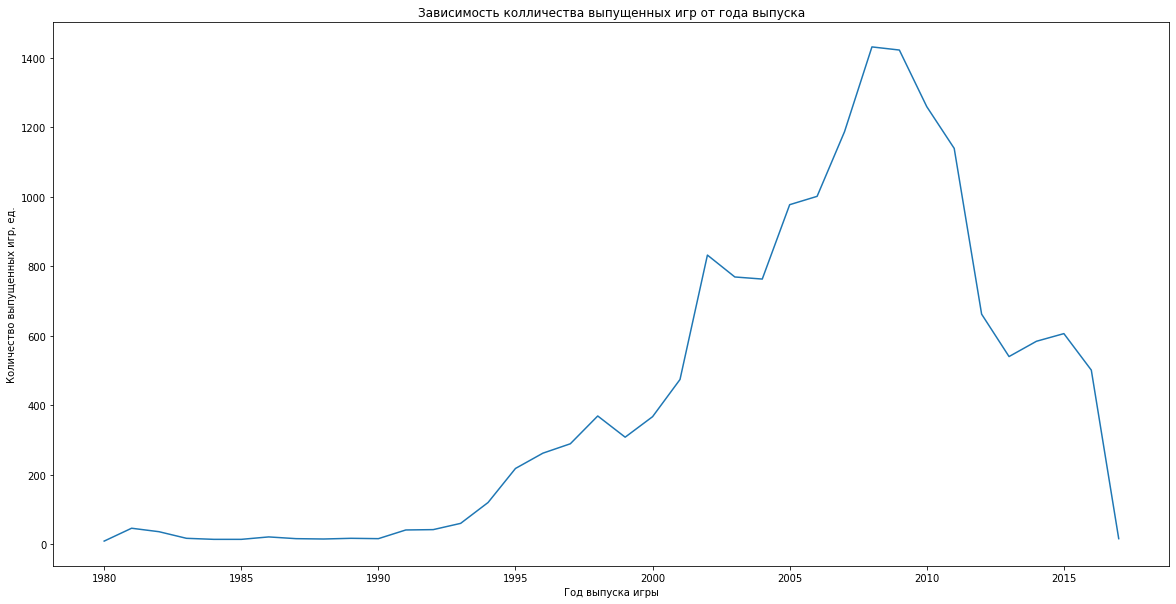

In [41]:
plt.figure(figsize=[20, 10]) 
plt.plot(np.array(year_of_release_grouped.index),np.array(year_of_release_grouped))
plt.title('Зависимость колличества выпущенных игр от года выпуска')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество выпущенных игр, ед.')
plt.show()

На мой взгляд, по количеству выпущенных игр можно выделить 4 периода:
* 1985-1995 гг. - менее одной игры в год. Зарождение индустрии.
* 1996-2001 гг. - менее 100 игр в год. Появление ПК и других платформ, развитие технологий.
* 2002-2011 гг. - около 500 игр в год. Становление ПК и других платформ доступными для каждого.
* 2012-наст.вр. - 200-300 игр в год. Экономический кризис, в виду развития и усложнения технологий, также рост времени производства игр. 

Для прогнозирования продаж на следующий год имеет важность период с 2012 года, т.к. на продажи игр в более ранних периодах влияли другие факторы - отсутствовала конкуренция, у малого количества людей имелись ПК, части представленных платформ не существовало, игры производились с помощью совсех других технологий, и сами были совсем другими.

### Анализ платформ

Необходимо посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Узнать, за какой характерный срок появляются новые и исчезают старые платформы.

In [42]:
platform_sales_grouped = pd.pivot_table(data, index=['platform'], values='total_sales', 
                                        aggfunc='sum').sort_values('total_sales',ascending=False)
# создаю таблицу, в которой в роли индексов будут выступать платформы, а в роли значений 
# суммарные продажи
platform_sales_grouped

,total_sales
platform,
PS2,1247.000000
X360,961.500000
PS3,931.500000
Wii,891.000000
DS,803.000000
PS,727.500000
PS4,314.250000
GBA,313.000000
PSP,290.250000


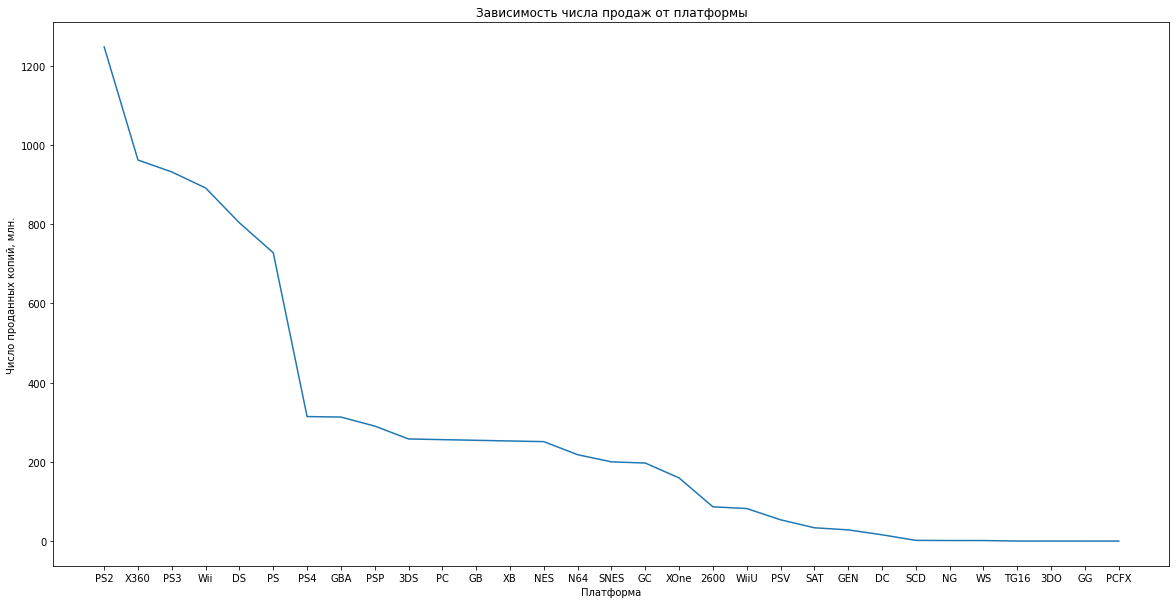

In [43]:
plt.figure(figsize=[20, 10]) 
plt.plot(np.array(platform_sales_grouped.index),np.array(platform_sales_grouped))
plt.title('Зависимость числа продаж от платформы')
plt.xlabel('Платформа')
plt.ylabel('Число проданных копий, млн.')
plt.show()

Видно резкое изменение на графике в районе платформы PS4, поэтому выберу эти 6 платформ как платформы с самыми высокими суммарными продажами. 

In [44]:
best_sales_platform = list(platform_sales_grouped.index[:6])
best_sales_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Теперь посмотрим распределение их продаж по годам.

In [45]:
for platform in best_sales_platform:
    print('Платформа ', platform)
    platform_sales_grouped = pd.pivot_table(data.query('platform == @platform'), 
                                            index=['platform','year_of_release'], 
                                            values='total_sales', aggfunc='sum')
    print(platform_sales_grouped)
    print()

Платформа  PS2
                          total_sales
platform year_of_release             
PS2      2000               35.062500
         2001              158.125000
         2002              201.750000
         2003              189.750000
         2004              214.125000
         2005              175.625000
         2006              103.625000
         2007               76.500000
         2008               56.187500
         2009               27.906250
         2010                7.480469
         2011                1.179688
         2012                0.059998

Платформа  X360
                          total_sales
platform year_of_release             
X360     2005                8.250000
         2006               49.750000
         2007               94.375000
         2008              135.875000
         2009              120.375000
         2010              170.375000
         2011              143.625000
         2012              101.500000
         2013     

Из представленных данных видно, что пик популярности платформы составляет 5-7 лет, хорошо это видно на платформах одного производителя серии PS. За это время технологии развиваются достаточно, чтобы можно было усовершенствовать платформы и выпустить новые.

Также видно, что именно с выпуском новых платформ начинается резкий спад продаж у старых. Чаще всего пик продаж начинается на второй год с выпуска платформы.

Платформа PS4 еще находится в своем пике, и он придется на прогнозируемый 2017 год.

### Выделение актуальных данных

Необходимо взять данные за соответствующий актуальный период. Актуальный период был определен в пункте 3.1. 

In [46]:
actual_data = data.query('year_of_release >= 2012')
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2909 entries, 16 to 16459
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2909 non-null   object 
 1   platform         2909 non-null   object 
 2   year_of_release  2909 non-null   uint16 
 3   genre            2909 non-null   object 
 4   na_sales         2909 non-null   float64
 5   eu_sales         2909 non-null   float64
 6   jp_sales         2909 non-null   float64
 7   other_sales      2909 non-null   float64
 8   critic_score     2909 non-null   uint8  
 9   user_score       2909 non-null   float16
 10  rating           2909 non-null   object 
 11  total_sales      2909 non-null   float16
dtypes: float16(2), float64(4), object(4), uint16(1), uint8(1)
memory usage: 224.4+ KB


### Оценка продаж платформ

Необходимо выяснить, какие платформы лидируют по продажам, растут или падают. Выбрать несколько потенциально прибыльных платформ.

In [47]:
top_sales_platform = pd.pivot_table(actual_data, index=['platform','year_of_release'], 
                                     values='total_sales', aggfunc = 'sum')
top_sales_platform

total_sales
platform year_of_release             
3DS      2012               51.187500
         2013               56.562500
         2014               43.937500
         2015               27.781250
         2016               15.140625
DS       2012               11.023438
         2013                1.540039
PC       2012               22.765625
         2013               13.531250
         2014               12.960938
         2015                9.843750
         2016                5.531250
         2017                0.119995
PS       2012                0.370117
PS2      2012                0.059998
PS3      2012              108.250000
         2013              112.500000
         2014               49.218750
         2015               17.062500
         2016                4.011719
         2017                0.179932
PS4      2013               26.968750
         2014               97.687500
         2015              119.062500
         2016               69.937500
         2017                0.489990
PSP      2012                8.101562
         2013                3.259766
         2014                0.400146
         2015                0.119995
PSV      2012               16.125000
         2013               10.492188
         2014               12.000000
         2015                6.250000
         2016                4.250000
         2017                0.059998
Wii      2012               26.187500
         2013                5.199219
         2014                5.320312
         2015                2.199219
         2016                0.950195
         2017                0.180054
WiiU     2012               17.421875
         2013               20.421875
         2014               22.671875
         2015               16.515625
         2016                5.070312
         2017                0.099976
X360     2012              101.500000
         2013               86.750000
         2014               36.156250
         2015               12.304688
         2016                1.860352
         2017                0.160034
XOne     2013               19.125000
         2014               53.250000
         2015               60.375000
         2016               26.500000
         2017                0.070007

In [48]:
top_total_sales_platform = pd.pivot_table(actual_data, index='platform', 
                                          values='total_sales', 
                                          aggfunc = 'sum').sort_values('total_sales', ascending=False)
top_total_sales_platform

,total_sales
platform,
PS4,314.250000
PS3,291.250000
X360,238.750000
3DS,194.625000
XOne,159.375000
WiiU,82.187500
PC,64.750000
PSV,49.187500
Wii,40.031250


* За весь актуальный период по суммарному количеству продаж лидируют платформы PS4, PS3, X360, И XOne.
* За 2016 год лучшие продажи у XOne и PS4.
* У платформ DS, Wii, PSP, PS3 нет продаж в 2016 или 2017 гг.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [49]:
actual_platform = ['PS4', 'PS3', 'X360','XOne']
actual_platform_data = actual_data.query('platform in @actual_platform')

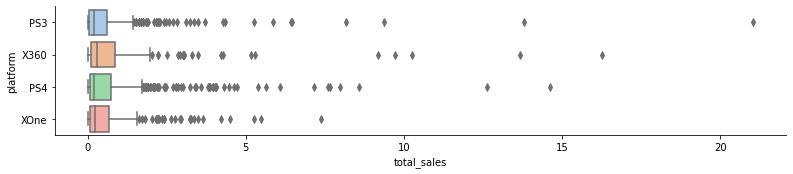

In [50]:
g = sns.catplot(y='platform', x='total_sales', kind="box", data=actual_platform_data, orient='h', palette = 'pastel')
g.fig.set_figwidth(12)
g.fig.set_figheight(2)

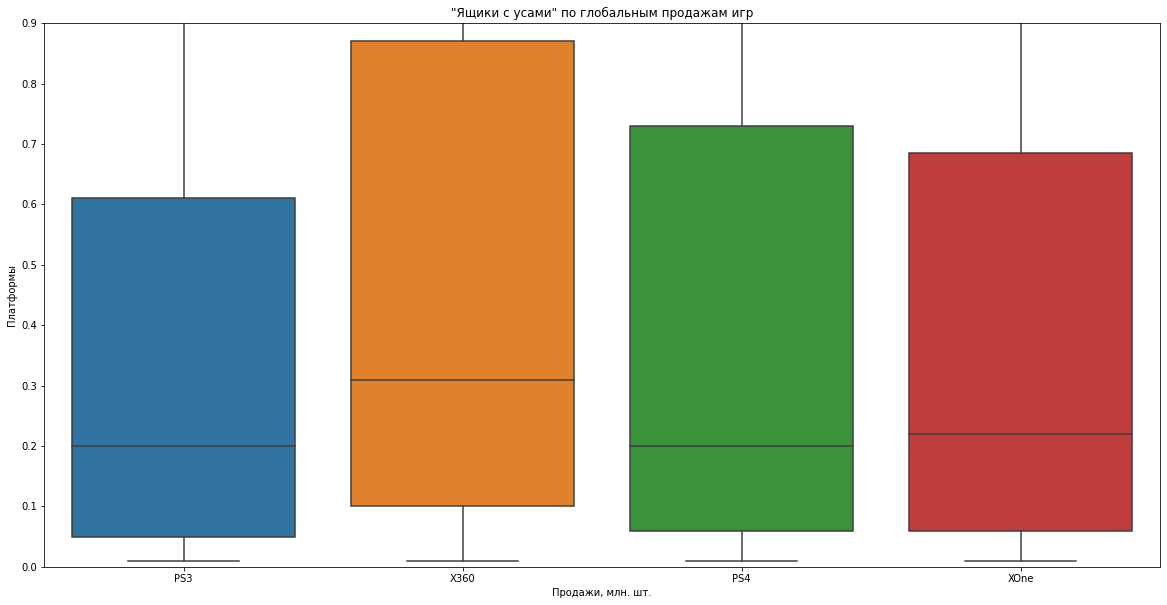

In [54]:
plt.figure(figsize=(20, 10))

sns.boxplot(data=actual_platform_data, x='platform', y='total_sales')

plt.ylim(0, 0.9)

plt.title('"Ящики с усами" по глобальным продажам игр')
plt.xlabel('Продажи, млн. шт.')
plt.ylabel('Платформы')

plt.show()


In [51]:
for platform in actual_platform:
    print ('Название платформы:', platform) 
    print (actual_data.loc[actual_data['platform'] == platform, 'total_sales'].describe())
    print ()

print ('Общие продажи')
print (actual_data['total_sales'].describe())

Название платформы: PS4
count    392.000000
mean       0.801758
std        1.609375
min        0.010002
25%        0.059998
50%        0.199951
75%        0.729980
max       14.632812
Name: total_sales, dtype: float64

Название платформы: PS3
count    494.000000
mean       0.589355
std        1.462891
min        0.010002
25%        0.049988
50%        0.199951
75%        0.609863
max       21.046875
Name: total_sales, dtype: float64

Название платформы: X360
count    298.000000
mean       0.801270
std        1.696289
min        0.010002
25%        0.099976
50%        0.310059
75%        0.870117
max       16.265625
Name: total_sales, dtype: float64

Название платформы: XOne
count    247.000000
mean       0.645020
std        1.036133
min        0.010002
25%        0.059998
50%        0.219971
75%        0.685059
max        7.390625
Name: total_sales, dtype: float64

Общие продажи
count    2909.000000
mean        0.501953
std         1.246094
min         0.010002
25%         0.040009
50%

Среднее число проданных копий: 502 тыс. У 3/4 игр было продано до 430 тыс. Рекорд 21,05 млн.

Среднее число проданных копий по платформе PS3: 589 тыс. У 3/4 игр было продано до 610 тыс. Рекорд 21,04 млн.

Среднее число проданных копий по платформе X360: 801 тыс. У 3/4 игр было продано до 870 тыс. Рекорд 16,3 млн.

Среднее число проданных копий по платформе PS4: 802 тыс. У 3/4 игр было продано до 730 тыс. Рекорд 14,6 млн.

Среднее число проданных копий по платформе XOne: 645 тыс. У 3/4 игр было продано до 685 тыс. Рекорд 7,39 млн.

* За весь актуальный период по суммарному количеству продаж лидируют платформы PS4, PS3, X360, И XOne.
* За 2016 год лучшие продажи у XOne и PS4.
* Игры с количеством продаж больше 10 млн (лучшие игры) имеются у платформ PS3, PS4 и X360.
* У платформ DS, Wii, PSP, PS3 нет продаж в 2016 или 2017 гг.

**В виду снижения числа выпускаемых игр, можно видеть и тенденцию к снижению числа продаж у всех платформ. Однако, исходя из вышеперечисленного, можно выделить перспективные платформы - это XOne и PS4. Это самые молодые платформы, которые еще "отжили" свой цикл и 5-7 лет, и имеющие высокие числа проданных копий.**

### Оценка влияния на продажи отзывов

Необходимо посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. 

In [52]:
PS4_sales = actual_data.loc[actual_data['platform'] == 'PS4',['total_sales', 'critic_score', 'user_score']]
PS4_sales.head()

,total_sales,critic_score,user_score
31,14.632812,0,0.000000
42,12.617188,97,8.296875
77,8.578125,82,4.300781
87,7.980469,0,0.000000
92,7.660156,83,5.699219


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

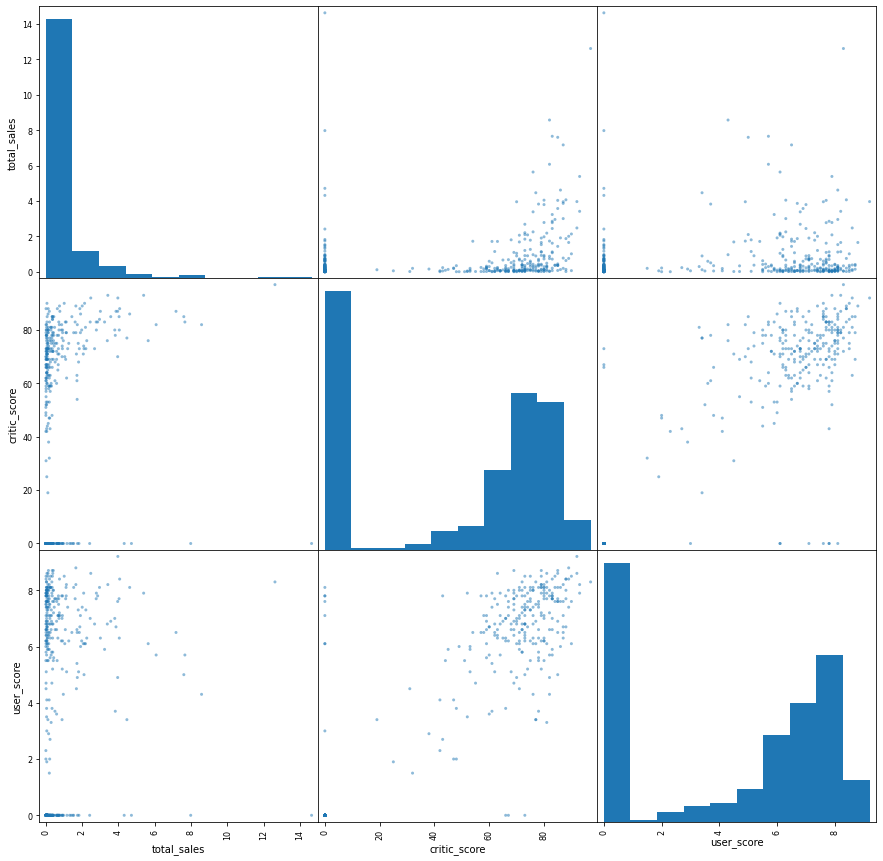

In [53]:
pd.plotting.scatter_matrix(PS4_sales, figsize=(15, 15))

In [54]:
PS4_sales.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.227537,0.113086
critic_score,0.227537,1.000000,0.900837
user_score,0.113086,0.900837,1.000000


Есть прямая средневыраженная корреляция (23%) между продажами и рейтингом критиков, и сильновыраженная (90%) между мнением критиков и мнением пользователей. Однако корреляция между продажами и рейтингом пользователей практически отсутствует.
Можно сделать предположение, что на мнение игроков влияет оценка критиков.

Соотнесем выводы с продажами игр на других платформах.

In [55]:
for platform in actual_platform:
    print ('Наименование платформы:', platform)
    platform_sales = actual_data.loc[(actual_data['platform'] == platform), ['total_sales', 'critic_score', 'user_score']]
    display (platform_sales.head())
    print()   
    print (platform_sales.corr())
    print()   

Наименование платформы: PS4


,total_sales,critic_score,user_score
31,14.632812,0,0.000000
42,12.617188,97,8.296875
77,8.578125,82,4.300781
87,7.980469,0,0.000000
92,7.660156,83,5.699219



              total_sales  critic_score  user_score
total_sales      1.000000      0.227537    0.113086
critic_score     0.227537      1.000000    0.900837
user_score       0.113086      0.900837    1.000000

Наименование платформы: PS3


,total_sales,critic_score,user_score
16,21.046875,97,8.203125
34,13.789062,83,5.300781
69,9.359375,71,2.599609
81,8.171875,88,6.601562
126,6.460938,86,4.300781



              total_sales  critic_score  user_score
total_sales      1.000000      0.303031    0.215835
critic_score     0.303031      1.000000    0.761425
user_score       0.215835      0.761425    1.000000

Наименование платформы: X360


,total_sales,critic_score,user_score
23,16.265625,97,8.101562
35,13.679688,83,4.800781
60,10.242188,73,2.599609
66,9.710938,87,7.000000
72,9.179688,0,0.000000



              total_sales  critic_score  user_score
total_sales        1.0000      0.261200    0.101600
critic_score       0.2612      1.000000    0.647627
user_score         0.1016      0.647627    1.000000

Наименование платформы: XOne


,total_sales,critic_score,user_score
99,7.390625,0,0.000000
165,5.468750,97,7.898438
179,5.261719,81,5.398438
242,4.488281,84,6.398438
270,4.218750,88,6.199219



              total_sales  critic_score  user_score
total_sales      1.000000      0.274829    0.116511
critic_score     0.274829      1.000000    0.774128
user_score       0.116511      0.774128    1.000000




PS3



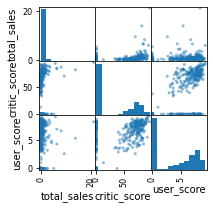


X360



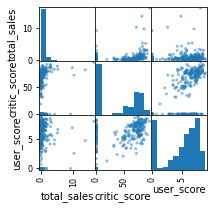


PS4



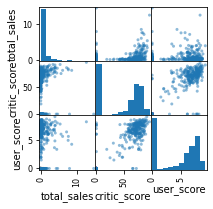


3DS



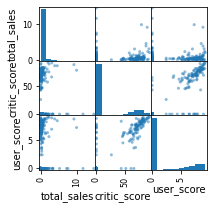


DS



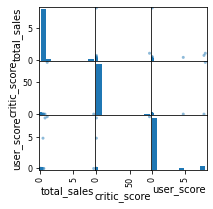


XOne



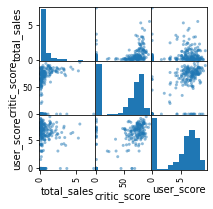


WiiU



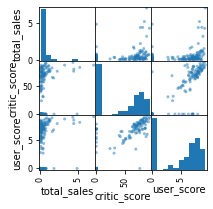


Wii



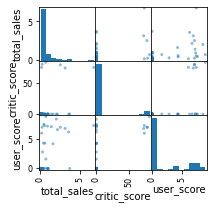


PC



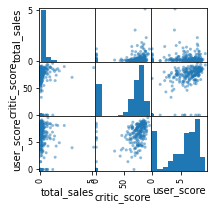


PSV



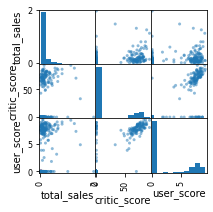


PSP



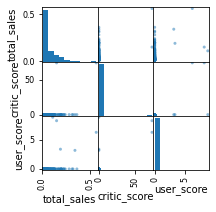


PS



/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.3701171875 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:89: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:90: UserWarning: Attempting to set identical bottom == top == 0.3701171875 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:89: UserWarning: Attempting to set identical left == right == 0.3701171875 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/conda/lib/python3.9/

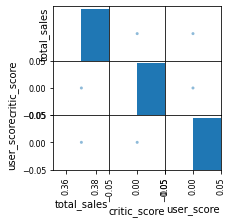


PS2



/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.05999755859375 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:90: UserWarning: Attempting to set identical bottom == top == 0.05999755859375 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:89: UserWarning: Attempting to set identical left == right == 8.203125 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:89: UserWarning: Attempting to set identical left == right == 0.05999755859375 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/con

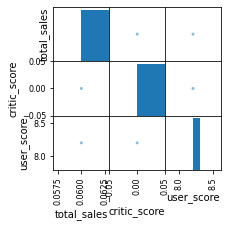

In [57]:
for platform in actual_data['platform'].unique():
    platform_sales = actual_data.loc[(actual_data['platform'] == platform), ['total_sales', 'critic_score', 'user_score']]
    print()
    print(platform)
    print()
    pd.plotting.scatter_matrix(platform_sales, figsize=(3, 3))
    plt.show()

У остальных платформ аналогичная корреляция, за исключением платформ WiiU, PSV, PSP, DS, предположительно, ввиду малого количества игр этих платформ в выборке. А также, у платформы 3DS выше, чем у остальных платформ, зависимость продаж от мнения пользователей. Возможно здесь лучше составлены рейтинги для иг и системы отзывов для игроков. 

### Анализ жанров

Необходимо посмотреть на общее распределение игр по жанрам. Оценить самые прибыльные жанры. Выяснить, выделяются ли жанры с высокими и низкими продажами.

In [71]:
genre_grouped_sum = pd.pivot_table(actual_data, index='genre', 
                               values='total_sales', 
                               aggfunc='sum').sort_values('total_sales', ascending=False)
genre_grouped_sum

,total_sales
genre,
Action,445.250000
Shooter,304.750000
Role-Playing,193.000000
Sports,188.500000
Misc,85.312500
Platform,61.000000
Racing,53.875000
Fighting,44.500000
Simulation,35.187500


In [72]:
genre_grouped_median = pd.pivot_table(actual_data, index='genre', 
                               values='total_sales', 
                               aggfunc='median').sort_values('total_sales', ascending=False)
genre_grouped_median

,total_sales
genre,
Shooter,0.435059
Sports,0.250000
Platform,0.209961
Racing,0.150024
Role-Playing,0.140015
Fighting,0.130005
Action,0.119995
Misc,0.119995
Simulation,0.114990


Самыми прибыльными жанрами можно считать экшен (Action), шутеры (Shooter), спортивные игры (Sports) и ролевые игры (Role-Playing).

Экшен (action в переводе с англ. — «действие») или боевик (по аналогии с киножанром) — жанр компьютерных игр, в котором делается упор на эксплуатацию физических возможностей игрока, в том числе координации глаз и рук и скорости реакции.

Шутер (Стрелялка, англ. shooter — «стрелок») — жанр компьютерных игр. На момент зарождения жанра за рубежом укрепилось слово «шутер», как вариант описания игрового процесса и перевод для слова shooter, в России и некоторых других странах постсоветского пространства жанр изначально был назван как «стрелялка».

Спортивная видеоигра - это видеоигра, которая имитирует занятия спортом.

Компьютерная ролевая игра (англ. Computer Role-Playing Game) — жанр компьютерных игр, основанный на элементах игрового процесса традиционных настольных ролевых игр. В ролевой игре игрок управляет одним или несколькими персонажами, каждый из которых описан набором численных характеристик, списком способностей и умений; примерами таких характеристик могут быть очки здоровья, показатели силы, ловкости, интеллекта, защиты, уклонения, уровень развития того или иного навыка и т. п.

Платфо́рмер (разг. броди́лка; англ. platformer, platform game) — жанр компьютерных игр, в которых основу игрового процесса составляют прыжки по платформам, лазанье по лестницам, сбор предметов, необходимых для победы над врагами или завершения уровня.

Приключенческая игра - это видеоигра, в которой игрок берет на себя роль главного героя в интерактивной истории, управляемой исследованием и / или решением головоломок.

### Вывод ###

* Актуальный период для анализа - 2012-наст.вр. В более ранних данных имелись другие закономерности в продажах и производстве игр, технологии не были достаточно развиты.
* Снижаются число выпускаемых игр и число продаж у всех платформ. Наиболее перспективными платформами являются XOne и PS4.
* У перспективных платформ на мнение игроков и на продажи влияет оценка критиков.
* Самые прибыльные жанры по общим продажам - экшен (Action), шутеры (Shooter), спортивные игры (Sports) и ролевые игры (Role-Playing). По медианным продажам - шутеры, спортивные игры и платформы (Platform).
* Самые непопопулярные жанры - приключения (Adventure), пазлы (Puzzle), стратегии (Strategy), как в общих, так и в медианных продажах.

* Видно, что наиболее прибыльными жанрами оказались те, что не требуют решения сложных головоломок и больших умственных нагрузок - игры требующие этого, оказались в конце рейтинга. Так же популярные жанры объединяет динамичность, красочность. Экшен и шутер являются наиболее популярными жанрыми, которые как правило подразумевают под собой высокие рейтинги (Т и выше).

## Составление портретов пользователей каждого региона ##

Для начала сделаем срезы данных по каждому региону.

In [73]:
na_actual_data = actual_data.query('na_sales > 0')
na_actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 16 to 16423
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1695 non-null   object 
 1   platform         1695 non-null   object 
 2   year_of_release  1695 non-null   uint16 
 3   genre            1695 non-null   object 
 4   na_sales         1695 non-null   float64
 5   eu_sales         1695 non-null   float64
 6   jp_sales         1695 non-null   float64
 7   other_sales      1695 non-null   float64
 8   critic_score     1695 non-null   uint8  
 9   user_score       1695 non-null   float16
 10  rating           1695 non-null   object 
 11  total_sales      1695 non-null   float16
dtypes: float16(2), float64(4), object(4), uint16(1), uint8(1)
memory usage: 130.8+ KB


In [74]:
eu_actual_data = actual_data.query('eu_sales > 0')
eu_actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 16 to 16437
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1827 non-null   object 
 1   platform         1827 non-null   object 
 2   year_of_release  1827 non-null   uint16 
 3   genre            1827 non-null   object 
 4   na_sales         1827 non-null   float64
 5   eu_sales         1827 non-null   float64
 6   jp_sales         1827 non-null   float64
 7   other_sales      1827 non-null   float64
 8   critic_score     1827 non-null   uint8  
 9   user_score       1827 non-null   float16
 10  rating           1827 non-null   object 
 11  total_sales      1827 non-null   float16
dtypes: float16(2), float64(4), object(4), uint16(1), uint8(1)
memory usage: 141.0+ KB


In [75]:
jp_actual_data = actual_data.query('jp_sales > 0')
jp_actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1577 entries, 16 to 16459
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1577 non-null   object 
 1   platform         1577 non-null   object 
 2   year_of_release  1577 non-null   uint16 
 3   genre            1577 non-null   object 
 4   na_sales         1577 non-null   float64
 5   eu_sales         1577 non-null   float64
 6   jp_sales         1577 non-null   float64
 7   other_sales      1577 non-null   float64
 8   critic_score     1577 non-null   uint8  
 9   user_score       1577 non-null   float16
 10  rating           1577 non-null   object 
 11  total_sales      1577 non-null   float16
dtypes: float16(2), float64(4), object(4), uint16(1), uint8(1)
memory usage: 121.7+ KB


### Определение самых популярных платформ для пользователя каждого региона

Нужно определить для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Описать различия в долях продаж.

In [76]:
na_platform_grouped = pd.pivot_table(na_actual_data, index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_platform_grouped

,na_sales
platform,
X360,141.23
PS4,108.74
PS3,103.89
XOne,93.12
3DS,55.33
WiiU,38.10
PC,19.23
Wii,19.15
PSV,10.98


In [77]:
eu_platform_grouped = pd.pivot_table(eu_actual_data, index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_platform_grouped

,eu_sales
platform,
PS4,141.09
PS3,107.84
X360,75.24
XOne,51.59
3DS,42.64
PC,39.33
WiiU,25.13
Wii,13.89
PSV,11.36


In [78]:
jp_platform_grouped = pd.pivot_table(jp_actual_data, index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_platform_grouped

,jp_sales
platform,
3DS,87.79
PS3,35.84
PSV,21.04
PS4,15.96
WiiU,13.01
PSP,10.76
Wii,3.88
DS,3.72
X360,1.62


* Самые популярные платформы Северной Америки - X360, PS4 и PS3.
* Самые популярные платформы Европы - PS4, PS3 и X360.
* Самые популярные платформы Японии - 3DS, PS3 и WiiU.

### Определение самых популярных жанров для пользователя каждого региона

Нужно определить для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). Пояснить разницу.

In [79]:
na_genre_grouped = pd.pivot_table(na_actual_data, index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_genre_grouped

,na_sales
genre,
Action,178.58
Shooter,144.77
Sports,84.11
Role-Playing,64.00
Misc,38.46
Platform,25.38
Fighting,19.79
Racing,17.43
Adventure,8.92


In [80]:
eu_genre_grouped = pd.pivot_table(eu_actual_data, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_genre_grouped

,eu_sales
genre,
Action,161.15
Shooter,113.47
Sports,72.63
Role-Playing,48.53
Racing,27.43
Misc,26.32
Platform,21.41
Simulation,14.60
Fighting,10.79


In [81]:
jp_genre_grouped = pd.pivot_table(jp_actual_data, index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_genre_grouped

,jp_sales
genre,
Role-Playing,65.63
Action,53.76
Misc,12.86
Simulation,10.41
Fighting,9.44
Shooter,9.25
Platform,8.63
Sports,8.28
Adventure,8.24


* Самые популярные жанры Северной Америки - экшен, шутер и спорт.
* Самые популярные жанры Европы - экшен, шутер и спорт.
* Самые популярные жанры Японии - ролевая игра, экшен и разные игры.

Разные игры (Misc) - игры, которые не вписываются ни в один раздел. В этом жанре собраны все странные, экзотические и уникальные игры.

### Выявление наличия влияния рейтинга ESRB на продажи в отдельном регионе

Нужно узнать, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [82]:
rating_grouped = pd.pivot_table(actual_data, index='rating', values='total_sales',
                                        aggfunc='sum').sort_values('total_sales', ascending=False)
rating_grouped

,total_sales
rating,
M,510.50
without rating,335.25
E,293.50
T,164.00
E10+,155.75


In [83]:
na_rating_grouped = pd.pivot_table(na_actual_data, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_rating_grouped

,na_sales
rating,
M,231.63
E,115.72
without rating,104.66
E10+,75.97
T,66.82


In [84]:
eu_rating_grouped = pd.pivot_table(eu_actual_data, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_rating_grouped

,eu_sales
rating,
M,194.21
E,116.08
without rating,93.68
E10+,55.37
T,53.07


In [85]:
jp_rating_grouped = pd.pivot_table(jp_actual_data, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_rating_grouped

,jp_sales
rating,
without rating,109.32
E,29.26
T,26.05
M,21.20
E10+,8.19


Во всех регионах лидируют рейтинги M, E и T. Однако в Северной Америке и Европе больше предпочтение отдают играм рейтинга М, а в Японии - Е.

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие.

«T» («Teen») — «Подросткам 13—19 лет»: Игра подходит для подростков старше 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

«M» («Mature») — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. 

Также видно, что в Японии лидируют игры, рейтинг которых не указан - предположительно, это может быть связано с тем, что в Японии имеются собственные рейтинги для оценки игр и рейтинг ESRB не имеет там значения.

Из этого можно сделать вывод, что игроки из Северной Америки и Европы предпочитают более жестокие игры, по сравнению с игроками из Японии.

### Вывод ###

Портреты пользователей Северной Америки и Европы практически идентичны: топ-3 предпочитаемые платформы одинаковы (X360, PS4 и PS3), разница лишь в том, что в Америке наибольшее предпочтение отдается платформе X360, а в Европе - PS4. Предпочитаемые жанры и рейтинги одинаковы - это жанры экшен, шутер, спорт и рейтинги М, Е, Т в порядке убывания популярности.

Портрет игроков Японии сильно отличается во всем - топ-3 предпочитаемые платформы 3DS, PS3 и WiiU (немного странно, ведь компания Sony, выпускающая серию платформ PS, является японской компанией). Предпочитаемые жанры и рейтинги - экшен, ролевая игра, платформер (однако ролевая игра и платформер находятся и в рейтинге пользователей СА и Европы дастоточно высоко) и рейтинги E, T, M.

Предположительно, такие отличия вызваны самобытной и изолированно сформировавшейся культурой Японии. Америка и Европа сотрудничают намного более тесно.

4/5 продаж приходятся на СА и Европу, поэтому рейтинги этих регионов практически повторяют общемировые рейтинги.

## Проверка гипотез ##

Предварительно для проверки гипотез о рейтингах придется убрать из данных ту часть, которую мы на этапе предобработки данных заполнили нулями, чтобы не исказить результаты.

In [90]:
actual_data_score_without_zero = actual_data.query('user_score != 0')

### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые ###

* H0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* H1 - средние пользовательские рейтинги платформ Xbox One и PC неодинаковые.

Данная гипотеза -  гипотеза о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, исходя из этого выбираем метод для исследования.

Так как нам не сказано, как именно должна различаться средняя выручка, гипотеза получается двухсторонней.

Критический уровень значимости выберем равный 0.01.

Мы не использовали дополнительный параметр equal_var = False, потому что у нас достаточно большие и одинаковые по размеру выборки, к тому же в обеих измерена одна и та же переменная — нет оснований полагать, что разброс будет сильно отличаться.

In [93]:
xone = actual_data_score_without_zero.loc[(actual_data_score_without_zero['platform'] == 'XOne'), 'user_score']
print (len(xone))
pc = actual_data_score_without_zero.loc[(actual_data_score_without_zero['platform'] == 'PC'), 'user_score']
print (len(pc))

182
211


In [92]:
alpha = .05

results = st.ttest_ind(xone, pc)

print('p-значение:', results.pvalue )

if ((results.pvalue) < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5974906755451574
Не получилось отвергнуть нулевую гипотезу


### Гипотеза 2:  Средние пользовательские рейтинги жанров Action и Sports разные  ###

* H0 - средние пользовательские рейтинги жанров Action и Sports одинаковые.
* H1 - средние пользовательские рейтинги жанров Action и Sports разные.

Данная гипотеза -  гипотеза о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, исходя из этого выбираем метод для исследования.

Так как нам не сказано, как именно должна различаться средняя выручка, гипотеза получается двухсторонней.

Критический уровень значимости выберем равный 0.01.

Мы использовали дополнительный параметр equal_var = False, потому что выборки отличаются по размеру.

In [94]:
action = actual_data_score_without_zero.loc[(actual_data_score_without_zero['genre'] == 'Action'), 'user_score']
print (len(action))
sports = actual_data_score_without_zero.loc[(actual_data_score_without_zero['genre'] == 'Sports'), 'user_score']
print (len(sports))

531
196


In [95]:
alpha = .05

results = st.ttest_ind(action, sports, equal_var = False)

print('p-значение:', results.pvalue )

if ((results.pvalue) < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.232252181871685e-19
Отвергаем нулевую гипотезу


### Вывод ###

Результаты статистического анализа данных не противоречат гипотезе о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, и противоречит гипотезе о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые.
 
В случае первой гипотезы, значение p-value говорит о том, что хотя средние пользовательские рейтинги платформ Xbox One и PC неодинаковые, с вероятностью в 60% такое или большее различие можно получить случайно. Это слишком большая вероятность, чтобы делать вывод о значимом различии между двумя этими категориями.

В случае второй гипотезы, значение p-value говорит о том, что хотя средние пользовательские рейтинги жанров Action и Sports неодинаковые, с вероятностью в почти 1.23^(-19)% такое или большее различие можно получить случайно. Вероятность ошибки в данном случае очень мала, что не противоречит гипотезе.

## Общий вывод ##

1. В исследовании рассматривались данные за период с 2012 г.
2. Замечена тенденция к снижению количества выпускаемых игр за год (за актуальный период оно снизилось от 500 до 200 ед.).
3. Наиболее перспективными платформами являются XOne и PS4 при расчете на общемировые продажи, а также продажи в регионах Северной Америки и Европы (4/5 продаж приходятся на СА и Европу, поэтому рейтинги этих регионов практически повторяют общемировые рейтинги). При расчете, что целевой аудиторией игры будет Япония, следует выбрать платформы 3DC и WiiU.
4. У перспективных платформ на мнение игроков и на продажи влияет оценка критиков. Корреляция продаж от мнения критиков - около 23%, корреляция мнения игроков от мнения критиков - около 90%.
5. Самые прибыльные жанры по общим продажам - экшен (Action) 445 млн, шутеры (Shooter) 304 млн, и ролевые игры (Role-Playing) 193 млн. По медианным продажам - шутеры 435 тыс., спортивные игры 250 тыс. и платформы (Platform) 210 тыс.
6. Самые непопопулярные жанры - приключения (Adventure) 11 млн., пазлы (Puzzle) 9 млн., стратегии (Strategy) 3 млн.
7. Игроки Северной Америки и Европы предпочитают  игры с более высокими рейтингами ESBR, чем игроки из Японии. Игроки Японии отдают наибольшее предпочтение играм, рейтинг которых не указан, исходя из чего можно сделать вывод, что в Японии существует своя рейтинговая система, и данный рейтинг там не имеет большой важности.
8. Результаты статистическиго анализа данных не противоречат гипотезе о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые (p-value 60%), и противоречит гипотезе о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые (p-value 1.23^(-19)%).
9. Средний срок эксплуатации платформы - 5-7 лет.

**Идеальной игрой на 2017 год будет игра, выпущенная на платформе PS4 в жанре шутер, с рейтингом M.**

**Необходимо усовершенствовать ввод данных в базу данных, чтобы не происходило появление дубликатов с одинаковыми наименованиями игр, но разделенными на несколько строк продажами. Также необходимо учесть особенности игр в Японии при выставлении рейтинга японским играм.**

**Также не следует недооценивать влияние компании, производящий игру, и возможно уделить этому моменту больше внимания, т.к. репутация производителя обязательно скажется на количестве продаж.**